In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sbn
import statsmodels.api as sm
%matplotlib inline

# Data Cleansing

In [3]:
# Descriptive statistics

sales_data = pd.read_csv("Real_Estate_Sales_n5.csv")

print(sales_data.describe())
print(sales_data.info())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

Text(0.5, 1.0, 'Histogram for Sales Price')

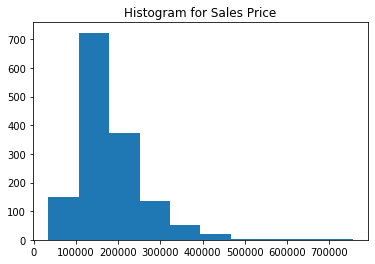

In [4]:
# Sales price histogram

plt.hist(sales_data['SalePrice'])
plt.title("Histogram for Sales Price")

Text(0.5, 1.0, 'Box Plot for Sales Price')

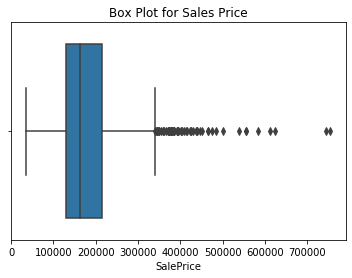

In [5]:
# Sales price box plot

sbn.boxplot(sales_data['SalePrice'])
plt.title("Box Plot for Sales Price")

In [6]:
# Count of missing data

missing_data = sales_data.isnull().sum().sort_values(ascending=False)
missing_data.head(25)


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
YearRemodAdd       0
MSSubClass         0
Foundation         0
ExterCond          0
ExterQual          0
dtype: int64

In [7]:
# Creating interquartile ranges

Q1 = sales_data.quantile(0.25)
Q3 = sales_data.quantile(0.75)
IQR = Q3 - Q1

print(IQR)

Id                 729.50
MSSubClass          50.00
LotFrontage         21.00
LotArea           4048.00
OverallQual          2.00
OverallCond          1.00
YearBuilt           46.00
YearRemodAdd        37.00
MasVnrArea         166.00
BsmtFinSF1         712.25
BsmtFinSF2           0.00
BsmtUnfSF          585.00
TotalBsmtSF        502.50
1stFlrSF           509.25
2ndFlrSF           728.00
LowQualFinSF         0.00
GrLivArea          647.25
BsmtFullBath         1.00
BsmtHalfBath         0.00
FullBath             1.00
HalfBath             1.00
BedroomAbvGr         1.00
KitchenAbvGr         0.00
TotRmsAbvGrd         2.00
Fireplaces           1.00
GarageYrBlt         41.00
GarageCars           1.00
GarageArea         241.50
WoodDeckSF         168.00
OpenPorchSF         68.00
EnclosedPorch        0.00
3SsnPorch            0.00
ScreenPorch          0.00
PoolArea             0.00
MiscVal              0.00
MoSold               3.00
YrSold               2.00
SalePrice        84025.00
dtype: float

In [8]:
# Checking for outliers

print ("The dataset has " + str(len(sales_data)) + " entries without any outliers removed.") 

sd_o = sales_data[~((sales_data < (Q1 - 1.5 * IQR)) |(sales_data > (Q3 + 1.5 * IQR))).any(axis=1)]

print ("The dataset has " + str(len(sd_o)) + " entries with the outliers removed.")
print ("The proportion of outliers in the dataset is: " + str(len(sd_o)/len(sales_data)))

The dataset has 1460 entries without any outliers removed.
The dataset has 563 entries with the outliers removed.
The proportion of outliers in the dataset is: 0.3856164383561644


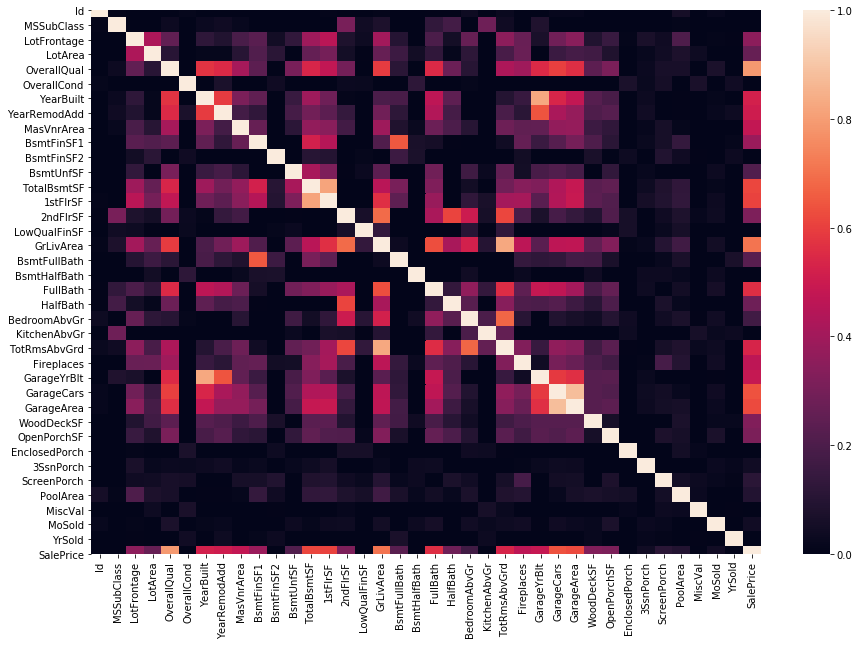

In [9]:
# Correlation heatmap

corr = sales_data.corr()
f, ax = plt.subplots(figsize=(15, 10))
sbn.heatmap(corr, vmin=0, vmax=1)

plt.show()

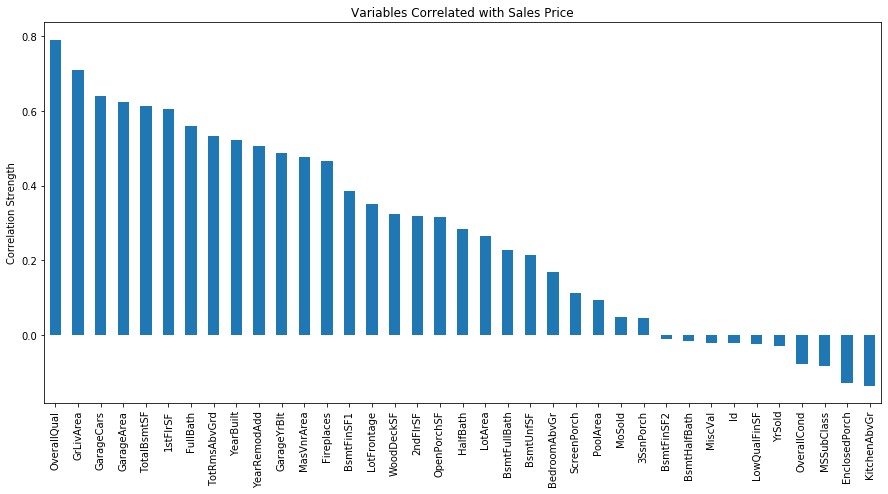

In [10]:
# Bar plot with correlations

f, ax = plt.subplots(figsize=(15, 7))
corr = corr.sort_values('SalePrice', ascending=False)
corr=corr['SalePrice'].drop('SalePrice')
corr.plot(kind='bar')
plt.title("Variables Correlated with Sales Price")
plt.ylabel("Correlation Strength")

plt.show()

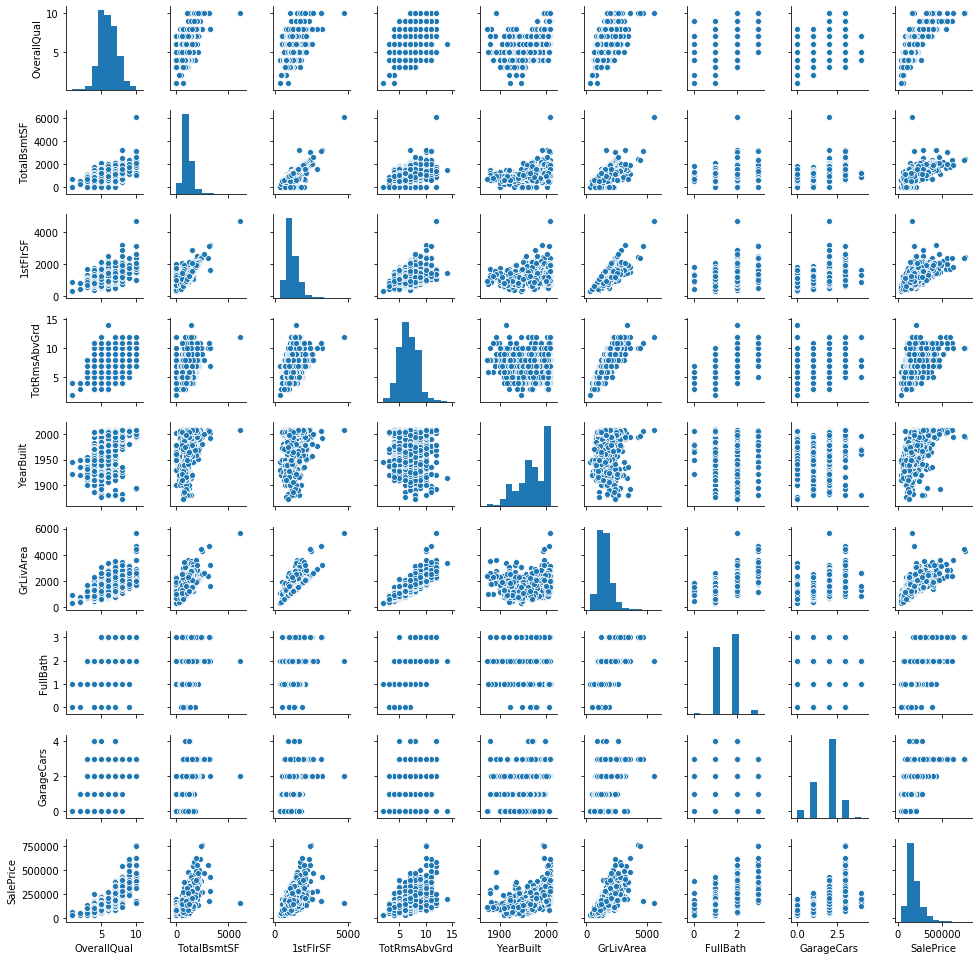

In [4]:
# Pair plot of variables correlated with sales price

cols = ['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'GrLivArea', 'FullBath', 'GarageCars', 'SalePrice']

sbn.pairplot(sales_data[cols], height=1.5)

plt.show()

In [84]:
# Deleting outlier in TotalBsmtSF (same outlier also appeared in GrLivArea)

sales_data.sort_values(by = 'TotalBsmtSF', ascending = False)[:2]
sales_data = sales_data.drop(sales_data[sales_data['Id'] == 1299].index)

In [85]:
# Deleting outlier in GrLivArea

sales_data.sort_values(by = 'GrLivArea', ascending = False)[:2]
sales_data = sales_data.drop(sales_data[sales_data['Id'] == 524].index)

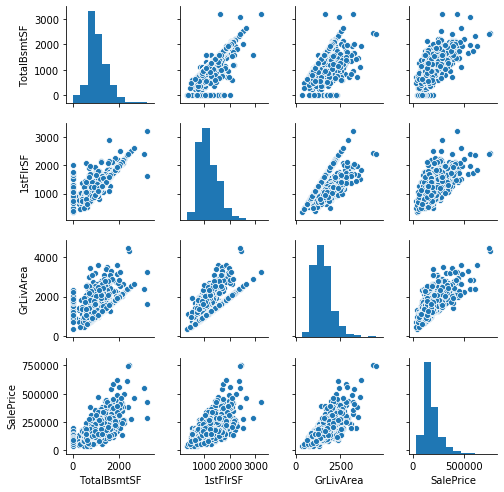

In [86]:
# Pair plot of correlated variables with outliers removed

cols_out = ['TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'SalePrice']

sbn.pairplot(sales_data[cols_out], height=1.75)

plt.show()

# Insights

In [87]:
# OLS regression with 7 independent variables

cols = ['OverallQual', 'TotalBsmtSF', 'TotRmsAbvGrd', 'YearBuilt', 'GrLivArea', 'FullBath', 'GarageCars', 'SalePrice']
dependentVar = sales_data['SalePrice']

sales_data = sales_data[cols]
cols = sales_data.drop(['SalePrice'],axis=1)
cols = sm.add_constant(cols)

model = sm.OLS(dependentVar, cols)
model_fit = model.fit()
print(model_fit.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     912.1
Date:                Fri, 28 Feb 2020   Prob (F-statistic):               0.00
Time:                        15:40:58   Log-Likelihood:                -17290.
No. Observations:                1458   AIC:                         3.460e+04
Df Residuals:                    1450   BIC:                         3.464e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -8.301e+05   8.19e+04    -10.139   

C:\Users\ceb41\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0       209874.855716
1       171013.429468
2       223496.543638
3       196104.154815
4       283380.298293
            ...      
1455    192557.257457
1456    241290.175566
1457    231908.613691
1458    123609.394838
1459    147241.279070
Length: 1458, dtype: float64


Text(0.5, 0, 'REGRESSION EQUATION')

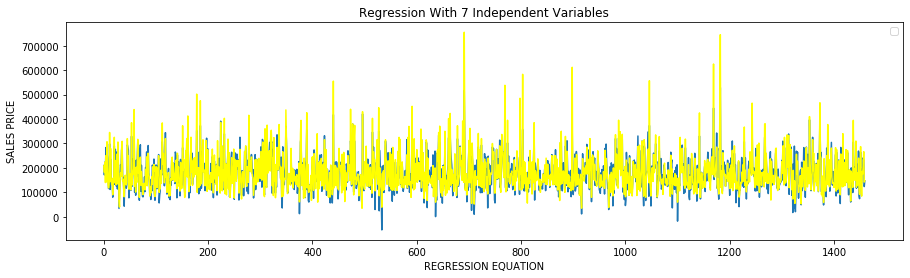

In [104]:
# Validation

mpl.rcParams['figure.figsize'] = (15,4)
ax = model_fit.predict(cols)
print(ax)

fig, ax1 = plt.subplots()
ax1.plot(ax)
ax1.plot(dependentVar, color='yellow')
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, loc='best')

plt.title("Regression With 7 Independent Variables")
plt.ylabel("SALES PRICE")
plt.xlabel("REGRESSION EQUATION")


In [70]:
# OLS regression with 3 independent variables

cols_2 = ['OverallQual', 'GrLivArea', 'GarageCars', 'SalePrice']
dependentVar = sales_data['SalePrice']

sales_data = sales_data[cols_2]
cols_2 = sales_data.drop(['SalePrice'],axis=1)
cols_2 = sm.add_constant(cols_2)

model = sm.OLS(dependentVar, cols_2)
model_fit = model.fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     1556.
Date:                Fri, 28 Feb 2020   Prob (F-statistic):               0.00
Time:                        15:01:33   Log-Likelihood:                -17471.
No. Observations:                1458   AIC:                         3.495e+04
Df Residuals:                    1454   BIC:                         3.497e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.056e+05   4657.841    -22.679      

0       221514.182896
1       168475.503740
2       225954.283313
3       241518.213763
4       296484.831257
            ...      
1455    190968.117699
1456    215856.048989
1457    238725.204215
1458    111265.257050
1459    121664.439608
Length: 1458, dtype: float64


Text(0.5, 0, 'REGRESSION EQUATION')

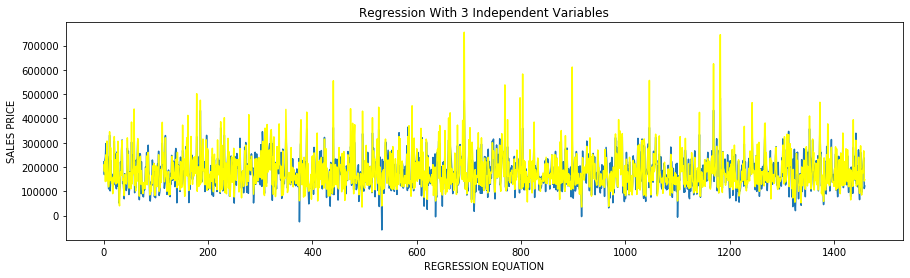

In [71]:
# Validation

mpl.rcParams['figure.figsize'] = (15,4)
ax = model_fit.predict(cols_2)
print(ax)

fig, ax1 = plt.subplots()
ax1.plot(ax)
ax1.plot(dependentVar, color='yellow')
plt.title("Regression With 3 Independent Variables")
plt.ylabel("SALES PRICE")
plt.xlabel("REGRESSION EQUATION")

In [18]:
# OLS regression with OverallQual

cols_oq = ['OverallQual', 'SalePrice']
dependentVar = sales_data['SalePrice']

sales_data = sales_data[cols_oq]
cols_oq = sales_data.drop(['SalePrice'],axis=1)
cols_oq = sm.add_constant(cols_oq)

model = sm.OLS(dependentVar, cols_oq)
model_fit = model.fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     2514.
Date:                Fri, 28 Feb 2020   Prob (F-statistic):          1.88e-319
Time:                        14:30:26   Log-Likelihood:                -17788.
No. Observations:                1458   AIC:                         3.558e+04
Df Residuals:                    1456   BIC:                         3.559e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.916e+04   5726.671    -17.315      

In [27]:
# OLS regression with GrLivArea

cols_gla = ['GrLivArea', 'SalePrice']
dependentVar = sales_data['SalePrice']

sales_data = sales_data[cols_gla]
cols_gla = sales_data.drop(['SalePrice'],axis=1)
cols_gla = sm.add_constant(cols_gla)

model = sm.OLS(dependentVar, cols_gla)
model_fit = model.fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     1710.
Date:                Fri, 28 Feb 2020   Prob (F-statistic):          6.59e-248
Time:                        14:39:44   Log-Likelihood:                -17953.
No. Observations:                1458   AIC:                         3.591e+04
Df Residuals:                    1456   BIC:                         3.592e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7168.9699   4432.501      1.617      0.1

In [33]:
# OLS regression with TotalBsmtSF

cols_bsf = ['TotalBsmtSF', 'SalePrice']
dependentVar = sales_data['SalePrice']

sales_data = sales_data[cols_bsf]
cols_bsf = sales_data.drop(['SalePrice'],axis=1)
cols_bsf = sm.add_constant(cols_bsf)

model = sm.OLS(dependentVar, cols_bsf)
model_fit = model.fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     880.3
Date:                Fri, 28 Feb 2020   Prob (F-statistic):          9.48e-152
Time:                        14:47:45   Log-Likelihood:                -18199.
No. Observations:                1460   AIC:                         3.640e+04
Df Residuals:                    1458   BIC:                         3.641e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.343e+04   4286.892     14.796      

In [30]:
# OLS regression with FullBath

cols_fb = ['FullBath', 'SalePrice']
dependentVar = sales_data['SalePrice']

sales_data = sales_data[cols_fb]
cols_fb = sales_data.drop(['SalePrice'],axis=1)
cols_fb = sm.add_constant(cols_fb)

model = sm.OLS(dependentVar, cols_fb)
model_fit = model.fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     668.4
Date:                Fri, 28 Feb 2020   Prob (F-statistic):          1.24e-121
Time:                        14:47:24   Log-Likelihood:                -18269.
No. Observations:                1460   AIC:                         3.654e+04
Df Residuals:                    1458   BIC:                         3.655e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.439e+04   5188.295     10.483      0.0

In [35]:
# OLS regression with GarageCars

cols_gc = ['GarageCars', 'SalePrice']
dependentVar = sales_data['SalePrice']

sales_data = sales_data[cols_gc]
cols_gc = sales_data.drop(['SalePrice'],axis=1)
cols_gc = sm.add_constant(cols_gc)

model = sm.OLS(dependentVar, cols_gc)
model_fit = model.fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     1014.
Date:                Fri, 28 Feb 2020   Prob (F-statistic):          2.50e-169
Time:                        14:48:15   Log-Likelihood:                -18159.
No. Observations:                1460   AIC:                         3.632e+04
Df Residuals:                    1458   BIC:                         3.633e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.062e+04   4102.261     14.777      0.0

In [106]:
# OLS regression with TotRmsAbvGrd

cols_n = ['TotRmsAbvGrd', 'SalePrice']
dependentVar = sales_data['SalePrice']

sales_data = sales_data[cols_n]
cols_n = sales_data.drop(['SalePrice'],axis=1)
cols_n = sm.add_constant(cols_n)

model = sm.OLS(dependentVar, cols_n)
model_fit = model.fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     580.8
Date:                Fri, 28 Feb 2020   Prob (F-statistic):          2.77e-108
Time:                        16:04:22   Log-Likelihood:                -18299.
No. Observations:                1460   AIC:                         3.660e+04
Df Residuals:                    1458   BIC:                         3.661e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          1.09e+04   7271.180      1.499   

In [108]:
# OLS regression with YearBuilt

cols_n = ['YearBuilt', 'SalePrice']
dependentVar = sales_data['SalePrice']

sales_data = sales_data[cols_n]
cols_n = sales_data.drop(['SalePrice'],axis=1)
cols_n = sm.add_constant(cols_n)

model = sm.OLS(dependentVar, cols_n)
model_fit = model.fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     548.7
Date:                Fri, 28 Feb 2020   Prob (F-statistic):          2.99e-103
Time:                        16:06:31   Log-Likelihood:                -18311.
No. Observations:                1460   AIC:                         3.663e+04
Df Residuals:                    1458   BIC:                         3.664e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.53e+06   1.16e+05    -21.858      0.0